## Импорты

In [15]:
import pandas as pd
import numpy as np
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Выгрузка данных из data.csv и последующая тренировка

In [19]:
df = pd.read_csv('data.csv', delimiter=';')

x_train = np.array(df['year']).reshape(-1, 1)
y_train = np.array(df['exam']).reshape(-1, 1)

scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train)

def positive_transform(y):
    return np.log1p(y)

def positive_inverse_transform(y):
    return np.expm1(y)

model = TransformedTargetRegressor(
    regressor=LinearRegression(),
    func=positive_transform,
    inverse_func=positive_inverse_transform
)

model.fit(x_train, y_train)

model = TransformedTargetRegressor(
    regressor=LinearRegression(),
    func=positive_transform,
    inverse_func=positive_inverse_transform
)
model.fit(x_train, y_train_scaled)

TransformedTargetRegressor(func=<function positive_transform at 0x78710c8e7d90>,
                           inverse_func=<function positive_inverse_transform at 0x78710d5bbac0>,
                           regressor=LinearRegression())

## Построение графика на предсказании для ближайших 8-ми лет

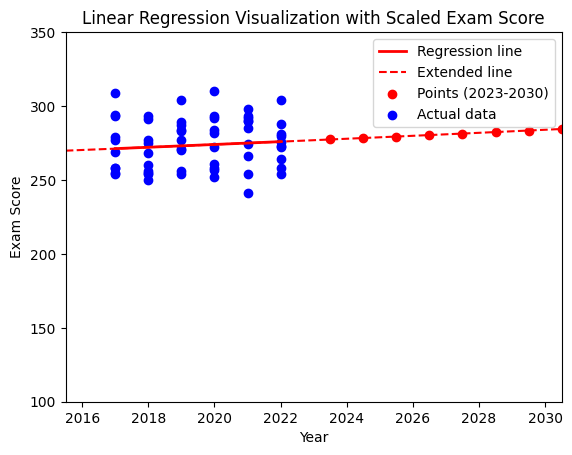

In [20]:
# Предсказания модели для обучающего набора данных
y_pred_scaled = model.predict(x_train)

# Обратное масштабирование для визуализации
y_pred = scaler.inverse_transform(y_pred_scaled)

# Создание новых данных для предсказания до 2030 года
x_future = np.arange(2015.5, 2031.5).reshape(-1, 1)

# Предсказания модели для новых данных
y_future_scaled = model.predict(x_future)

# Обратное масштабирование для визуализации предсказаний
y_future = scaler.inverse_transform(y_future_scaled)

# Визуализация данных, регрессионной линии и точек
plt.plot(x_train, y_pred, color='red', linewidth=2, label='Regression line')

# Продление красной линии до 2030 года
plt.plot(x_future, y_future, color='red', linestyle='--', label='Extended line')

# Визуализация данных и голубые точки на пересечениях с красной линией (2023-2030)
years_of_interest = np.arange(2023.5, 2031.5)
y_interest_scaled = model.predict(years_of_interest.reshape(-1, 1))
y_interest = scaler.inverse_transform(y_interest_scaled)
plt.scatter(years_of_interest, y_interest, color='red', marker='o', label='Points (2023-2030)')

# Визуализация данных
plt.scatter(x_train, y_train, color='blue', label='Actual data')

# Установка пределов по оси X
plt.xlim(2015.5, 2030.5)
plt.ylim(100, 350)

plt.xlabel('Year')
plt.ylabel('Exam Score')
plt.title('Linear Regression Visualization with Scaled Exam Score')
plt.legend()
plt.show()


## Выгрузка из ege.csv и тренировка

In [21]:
# Загрузка данных из CSV файла
data = pd.read_csv('ege.csv', delimiter=';')

# Выбор признаков (года) и целевых переменных (min_160 и min_220)
X = data['year'].values.reshape(-1, 1)
y_min_160 = data['min 160'].values
y_min_220 = data['min 220'].values

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_min_160_train, y_min_160_test, y_min_220_train, y_min_220_test = train_test_split(
    X, y_min_160, y_min_220, test_size=0.2, random_state=42
)

# Инициализация и тренировка модели для min 160
model_min_160 = LinearRegression()
model_min_160.fit(X_train, y_min_160_train)

# Инициализация и тренировка модели для min 220
model_min_220 = LinearRegression()
model_min_220.fit(X_train, y_min_220_train)

# Предсказание на тестовом наборе
y_min_160_pred = model_min_160.predict(X_test)
y_min_220_pred = model_min_220.predict(X_test)

# Оценка модели с использованием среднеквадратичной ошибки
mse_min_160 = mean_squared_error(y_min_160_test, y_min_160_pred)
mse_min_220 = mean_squared_error(y_min_220_test, y_min_220_pred)

print(f'MSE for min 160: {mse_min_160}')
print(f'MSE for min 220: {mse_min_220}')


MSE for min 160: 13762832.5
MSE for min 220: 10631713.0


## Построение графика с предсказанием на ближайшие пять лет

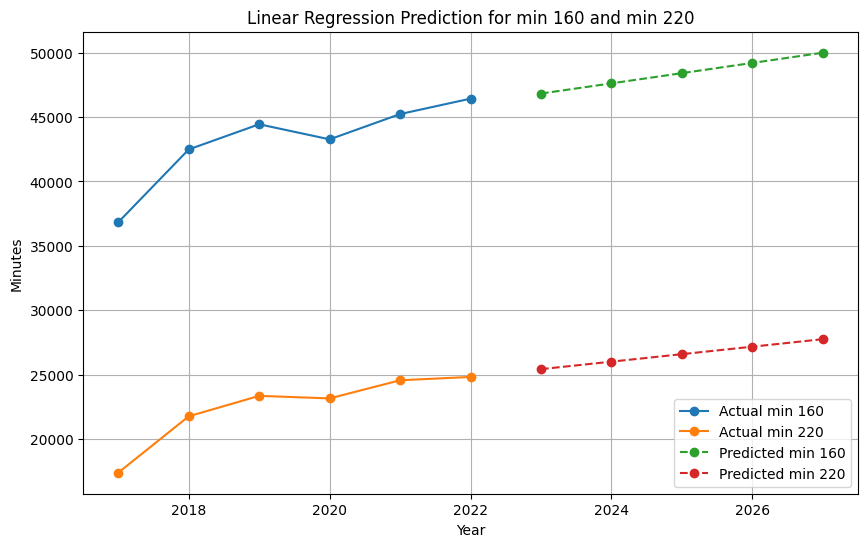

In [22]:
# Генерация данных для предсказания на ближайшие пять лет
future_years = np.arange(2023, 2028).reshape(-1, 1)

# Предсказание для min 160
future_min_160_pred = model_min_160.predict(future_years)

# Предсказание для min 220
future_min_220_pred = model_min_220.predict(future_years)

# Построение графика
plt.figure(figsize=(10, 6))

plt.plot(data['year'], data['min 160'], marker='o', linestyle='-', label='Actual min 160')
plt.plot(data['year'], data['min 220'], marker='o', linestyle='-', label='Actual min 220')

plt.plot(future_years, future_min_160_pred, marker='o', linestyle='--', label='Predicted min 160')
plt.plot(future_years, future_min_220_pred, marker='o', linestyle='--', label='Predicted min 220')

plt.title('Linear Regression Prediction for min 160 and min 220')
plt.xlabel('Year')
plt.ylabel('Minutes')
plt.legend()
plt.grid(True)
plt.show()
